In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
train_df = pd.read_csv('./train.csv')


In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"McEvoy, Mr. Michael",male,1601,B96 B98,S
freq,1,577,7,4,644


In [7]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train_df.drop(['PassengerId', 'Ticket', 'Fare', 'Cabin'], axis = 1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S
...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,C


In [10]:
survived = train_df[train_df['Survived'] == 1]
not_survived = train_df[train_df['Survived'] == 0]

In [11]:
print('Survived: %d (%.2f%%)' % (len(survived), (len(survived) / len(train_df) * 100.0))) 
print('Not Survived: %d (%.2f%%)' % (len(not_survived), (len(not_survived) / len(train_df) * 100.0))) 

Survived: 342 (38.38%)
Not Survived: 549 (61.62%)


In [12]:
train_df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [13]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


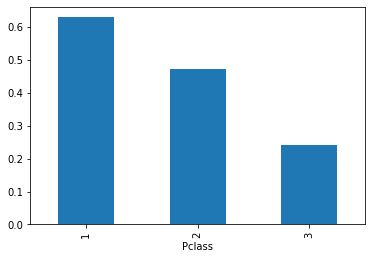

In [14]:
train_df.groupby('Pclass').Survived.mean().plot(kind='bar')

In [15]:
train_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [16]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


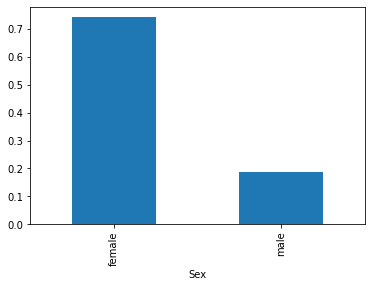

In [17]:
train_df.groupby('Sex').Survived.mean().plot(kind = 'bar')

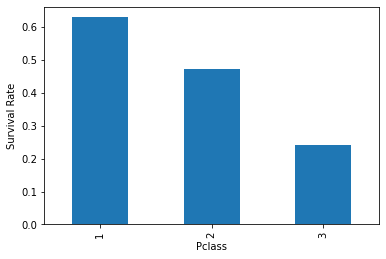

In [18]:
plot1 = train_df.groupby('Pclass').Survived.mean().plot(kind='bar')
plot1.set(ylabel = 'Survival Rate')
plot1.get_figure().savefig('Pclass vs Survived.png')

[Text(0, 0.5, 'Survival Rate'), Text(0.5, 0, 'Sex')]

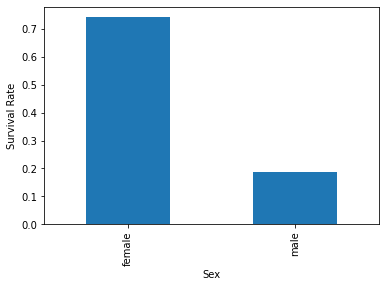

In [19]:
plot2 = train_df.groupby('Sex').Survived.mean().plot(kind = 'bar')
plot2.set(xlabel = 'Sex', ylabel = 'Survival Rate')
#plot2.get_figure().savefig('Sex vs Survived.png')

In [33]:
train_df['Count'] = 1
train_df.groupby('Survived', as_index = False).sum()

,Survived,PassengerId,Pclass,Age,SibSp,Parch,Fare,Count
0,0,245412,1390,12985.50,304,181,12142.7199,549
1,1,151974,667,8219.67,162,159,16551.2294,342


In [37]:
survival_rate = train_df.groupby('Survived', as_index = False).sum()
survival_rate

,Survived,PassengerId,Pclass,Age,SibSp,Parch,Fare,Count
0,0,245412,1390,12985.50,304,181,12142.7199,549
1,1,151974,667,8219.67,162,159,16551.2294,342


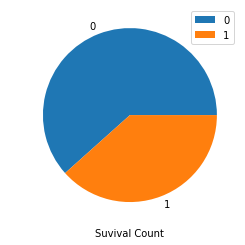

In [48]:
plot3 = survival_rate.plot(x = 'Survived', y = 'Count', kind = 'pie')
plot3.set(xlabel = 'Suvival Count', ylabel = ' ')
plot3.get_figure().savefig('Survival Count')

In [55]:
train_df = train_df.drop(['PassengerId', 'Ticket', 'Fare', 'Cabin'], axis = 1)

In [56]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,Count
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,S,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,S,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,S,1
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,C,1


In [65]:
train_df = train_df.dropna()

In [76]:
train_df = train_df.astype({'Survived' : 'int32', 'Pclass' : 'int32', 'Age' : 'int32'})

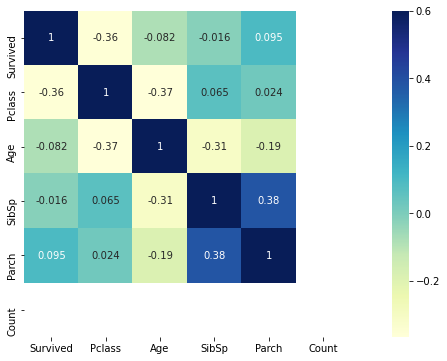

In [36]:
plt.figure(figsize=(15,6))
sns.heatmap(train_df.corr(), vmax=0.6, square=True, annot=True, cmap="YlGnBu")

In [63]:
train_df['Title'] = train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [64]:
train_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [65]:
train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')

In [66]:
train_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [67]:
train_df.drop(['Name'], axis = 1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Count,Title
0,0,3,male,22,1,0,S,1,Mr
1,1,1,female,38,1,0,C,1,Mrs
2,1,3,female,26,0,0,S,1,Miss
3,1,1,female,35,1,0,S,1,Mrs
4,0,3,male,35,0,0,S,1,Mr
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39,0,5,Q,1,Mrs
886,0,2,male,27,0,0,S,1,Other
887,1,1,female,19,0,0,S,1,Miss
889,1,1,male,26,0,0,C,1,Mr


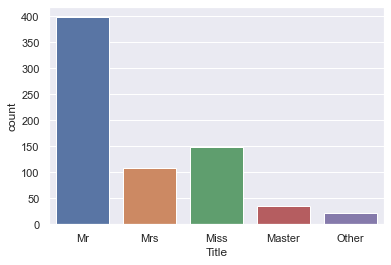

In [75]:
sns.countplot(x = 'Title', data = train_df)

Survived    0    1
Title             
Master     15   21
Miss       41  107
Mr        331   67
Mrs        23   85
Other      14    8


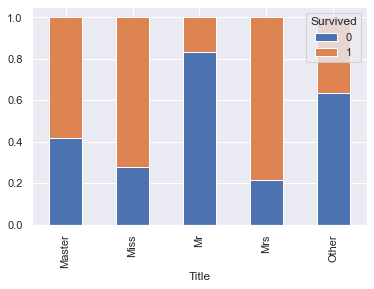

In [69]:
title_survived = pd.crosstab(train_df['Title'], train_df['Survived'])
print(title_survived)

title_survived.div(title_survived.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)